# Crimes
Para el siguiente ejercicio vamos a utilizar la base de datos de los crimenes en Chicago de 2001 a presente del siguiente [Link](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2)

In [1]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('../data/CrimesNoNA.csv')

In [4]:
# checar la informacion del dataframe
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,2753874,HJ394416,05/01/2003 12:00:00 PM,080XX S DREXEL AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,...,8.0,44.0,06,1183627.0,1851969.0,2003,04/15/2016 08:55:02 AM,41.748989,-87.602691,"(41.748988677, -87.602691353)"
1,1,2753875,HJ376019,05/20/2003 04:55:00 PM,048XX S PRAIRIE AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,3.0,38.0,16,1178856.0,1873092.0,2003,04/15/2016 08:55:02 AM,41.807062,-87.619531,"(41.807062178, -87.619531469)"
2,2,2753876,HJ384436,05/24/2003 03:25:00 PM,036XX S WENTWORTH AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,True,...,3.0,34.0,11,1175539.0,1881005.0,2003,04/15/2016 08:55:02 AM,41.828851,-87.631460,"(41.828851109, -87.631460054)"
3,3,2753877,HJ378088,05/21/2003 04:50:00 PM,122XX S HALSTED ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,...,34.0,53.0,18,1173211.0,1823609.0,2003,04/15/2016 08:55:02 AM,41.671401,-87.641694,"(41.671401054, -87.641694057)"
4,4,2753878,HJ377036,05/21/2003 09:01:47 AM,023XX N KARLOV AVE,2027,NARCOTICS,POSS: CRACK,STREET,True,...,31.0,20.0,18,1148661.0,1915297.0,2003,04/15/2016 08:55:02 AM,41.923513,-87.729189,"(41.923512556, -87.729188885)"


In [5]:
# información del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764119 entries, 0 to 5764118
Data columns (total 23 columns):
Unnamed: 0              int64
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(4), object(10)
memory usage: 934.5+ MB


In [6]:
# columnas que existen en el dataframe
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [7]:
data.count()

Unnamed: 0              5764119
ID                      5764119
Case Number             5764119
Date                    5764119
Block                   5764119
IUCR                    5764119
Primary Type            5764119
Description             5764119
Location Description    5764119
Arrest                  5764119
Domestic                5764119
Beat                    5764119
District                5764119
Ward                    5764119
Community Area          5764119
FBI Code                5764119
X Coordinate            5764119
Y Coordinate            5764119
Year                    5764119
Updated On              5764119
Latitude                5764119
Longitude               5764119
Location                5764119
dtype: int64

In [8]:
# eliminar datos nulos
data = data.dropna()

In [9]:
# data.to_csv('../data/CrimesNoNA.csv')

In [10]:
data.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,5.764119e+06,5.764119e+06,5.764119e+06,5.764119e+06,5.764119e+06,5.764119e+06,5.764119e+06,5.764119e+06,5.764119e+06,5.764119e+06,5.764119e+06
mean,2.985964e+06,6.427085e+06,1.190543e+03,1.129892e+01,2.262782e+01,3.765230e+01,1.164481e+06,1.885503e+06,2.008571e+03,4.184142e+01,-8.767194e+01
std,1.790435e+06,2.667375e+06,7.027939e+02,6.938395e+00,1.381158e+01,2.153224e+01,1.742568e+04,3.306369e+04,4.350682e+00,9.099525e-02,6.297949e-02
min,0.000000e+00,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,1.454616e+06,4.002952e+06,6.220000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152873e+06,1.858937e+06,2.005000e+03,4.176835e+01,-8.771406e+01
50%,2.944914e+06,6.440010e+06,1.034000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.165933e+06,1.890186e+06,2.008000e+03,4.185440e+01,-8.766637e+01
75%,4.387150e+06,8.708174e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.800000e+01,1.176352e+06,1.909179e+06,2.012000e+03,4.190659e+01,-8.762844e+01
max,6.458127e+06,1.112554e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


In [11]:
data.groupby('Year').count()['Arrest']

Year
2001      3850
2002    345009
2003    471992
2004    467128
2005    449870
2006    445495
2007    435527
2008    419787
2009    385828
2010    368409
2011    350470
2012    334394
2013    304243
2014    269320
2015    259583
2016    250472
2017    202742
Name: Arrest, dtype: int64

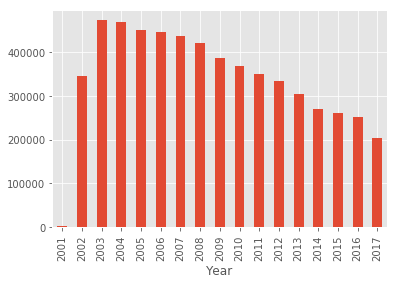

In [12]:
data.groupby('Year').count()['Arrest'].plot.bar()

In [13]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,2753874,HJ394416,05/01/2003 12:00:00 PM,080XX S DREXEL AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,...,8.0,44.0,06,1183627.0,1851969.0,2003,04/15/2016 08:55:02 AM,41.748989,-87.602691,"(41.748988677, -87.602691353)"
1,1,2753875,HJ376019,05/20/2003 04:55:00 PM,048XX S PRAIRIE AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,3.0,38.0,16,1178856.0,1873092.0,2003,04/15/2016 08:55:02 AM,41.807062,-87.619531,"(41.807062178, -87.619531469)"
2,2,2753876,HJ384436,05/24/2003 03:25:00 PM,036XX S WENTWORTH AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,True,...,3.0,34.0,11,1175539.0,1881005.0,2003,04/15/2016 08:55:02 AM,41.828851,-87.631460,"(41.828851109, -87.631460054)"
3,3,2753877,HJ378088,05/21/2003 04:50:00 PM,122XX S HALSTED ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,...,34.0,53.0,18,1173211.0,1823609.0,2003,04/15/2016 08:55:02 AM,41.671401,-87.641694,"(41.671401054, -87.641694057)"
4,4,2753878,HJ377036,05/21/2003 09:01:47 AM,023XX N KARLOV AVE,2027,NARCOTICS,POSS: CRACK,STREET,True,...,31.0,20.0,18,1148661.0,1915297.0,2003,04/15/2016 08:55:02 AM,41.923513,-87.729189,"(41.923512556, -87.729188885)"


In [15]:
len(data[data['Arrest']==True])

1613152

In [16]:
len(data[data['Arrest']==False])

4150967

In [17]:
data['Arrest'].count()

5764119

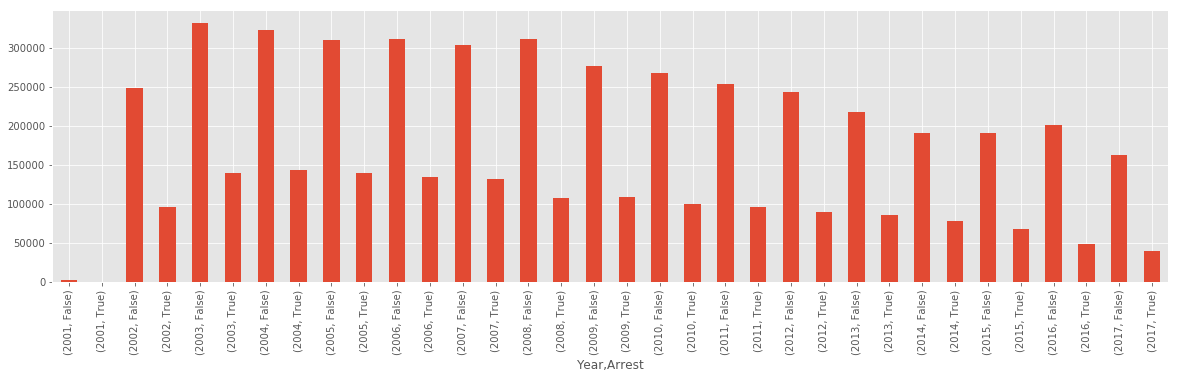

In [18]:
data.groupby(['Year','Arrest']).count()['ID'].plot.bar(figsize=(20,5))

In [19]:
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [20]:
data2 = data.filter(items=['Year','Primary Type', 'Arrest','Location Description','District'])

In [21]:
data2.head()

,Year,Primary Type,Arrest,Location Description,District
0,2003,THEFT,False,APARTMENT,6.0
1,2003,PROSTITUTION,True,STREET,2.0
2,2003,DECEPTIVE PRACTICE,True,STREET,9.0
3,2003,NARCOTICS,True,SIDEWALK,5.0
4,2003,NARCOTICS,True,STREET,25.0


In [22]:
for i in np.unique(data2['Primary Type']):
    data2[i] = [1 if x==i else 0 for x in data2['Primary Type']]

In [23]:
data2.head()

,Year,Primary Type,Arrest,Location Description,District,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,2003,THEFT,False,APARTMENT,6.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2003,PROSTITUTION,True,STREET,2.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2003,DECEPTIVE PRACTICE,True,STREET,9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,NARCOTICS,True,SIDEWALK,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2003,NARCOTICS,True,STREET,25.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


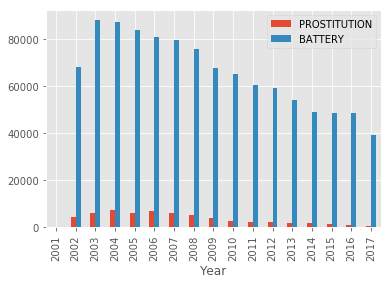

In [24]:
data2.groupby('Year').sum()[['PROSTITUTION','BATTERY']].plot.bar()

In [26]:
data2.columns

Index(['Year', 'Primary Type', 'Arrest', 'Location Description', 'District',
       'ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object')

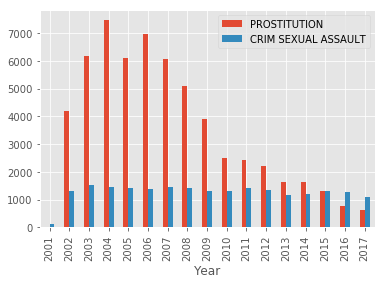

In [27]:
data2.groupby('Year').sum()[['PROSTITUTION','CRIM SEXUAL ASSAULT']].plot.bar()